## Run INSPIRE on the human DLPFC dataset

In this tutorial, we show INSPIRE's analysis of the human dorsolateral prefrontal cortex (DLPFC) dataset.

The spatial transcriptomics DLPFC data are publicly available at https://github.com/LieberInstitute/spatialLIBD.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import INSPIRE

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
data_dir = "data/DLPFC/spatialLIBD"

slice_idx = 151673
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st1 = adata_st.copy()
adata_st1.var_names_make_unique()

slice_idx = 151674
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st2 = adata_st.copy()
adata_st2.var_names_make_unique()

slice_idx = 151675
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st3 = adata_st.copy()
adata_st3.var_names_make_unique()

slice_idx = 151676
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st4 = adata_st.copy()
adata_st4.var_names_make_unique()

del adata_st
adata_st_list = [adata_st1, adata_st2, adata_st3, adata_st4]

### Data preprocessing

Finding highly variable genes...
shape of adata 0 before quality control:  (3611, 33525)
shape of adata 0 after quality control:  (3611, 13067)
shape of adata 1 before quality control:  (3635, 33525)
shape of adata 1 after quality control:  (3635, 13955)
shape of adata 2 before quality control:  (3566, 33525)
shape of adata 2 after quality control:  (3566, 12430)
shape of adata 3 before quality control:  (3431, 33525)
shape of adata 3 after quality control:  (3431, 12564)
Find 1857 shared highly variable genes among datasets.
Concatenate datasets as a full anndata for better visualization...


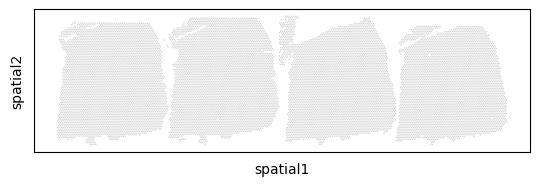

Store counts and library sizes for Poisson modeling...
Normalize data...


In [3]:
adata_st_list, adata_full = INSPIRE.utils.preprocess(adata_st_list=adata_st_list,
                                                     num_hvgs=6000,
                                                     min_genes_qc=50,
                                                     min_cells_qc=50,
                                                     spot_size=100)

### Build spaital graph

In [4]:
adata_st_list = INSPIRE.utils.build_graph_GAT(adata_st_list=adata_st_list, 
                                              rad_coef=1.1)

Start building graphs...
Calculate radius cutoff based on 'rad_coef' and mininal distance between spots/cells within a dataset...
Radius for graph connection is 150.7000.
Build graphs for GAT networks
5.8261 neighbors per cell on average.
5.8140 neighbors per cell on average.
5.8015 neighbors per cell on average.
5.8193 neighbors per cell on average.


### Run INSPIRE model

In [5]:
model = INSPIRE.model.Model_GAT(adata_st_list=adata_st_list,
                                n_spatial_factors=20,
                                n_training_steps=10000,
                               )

In [6]:
model.train()

  0%|          | 2/10000 [00:00<40:46,  4.09it/s]  

Step: 0, d_loss: 4.1890, Loss: 6191.5420, recon_loss: 5737.2090, fe_loss: 153.9308, geom_loss: 1659.0681, beta_loss: 265.5975, gan_loss: 1.6235


  5%|▌         | 502/10000 [01:11<22:32,  7.02it/s]

Step: 500, d_loss: 2.7276, Loss: 4500.6455, recon_loss: 4073.2205, fe_loss: 94.8756, geom_loss: 572.6364, beta_loss: 316.4294, gan_loss: 4.6677


 10%|█         | 1002/10000 [02:22<21:22,  7.01it/s]

Step: 1000, d_loss: 2.7397, Loss: 3324.3406, recon_loss: 2865.2095, fe_loss: 94.4973, geom_loss: 507.4727, beta_loss: 350.1769, gan_loss: 4.3074


 15%|█▌        | 1502/10000 [03:33<20:11,  7.01it/s]

Step: 1500, d_loss: 2.8014, Loss: 2606.3831, recon_loss: 2144.2754, fe_loss: 94.3163, geom_loss: 455.6437, beta_loss: 354.6157, gan_loss: 4.0627


 20%|██        | 2002/10000 [04:44<19:00,  7.02it/s]

Step: 2000, d_loss: 2.7963, Loss: 2241.6333, recon_loss: 1789.3611, fe_loss: 94.1776, geom_loss: 428.7357, beta_loss: 345.8549, gan_loss: 3.6649


 25%|██▌       | 2502/10000 [05:56<17:49,  7.01it/s]

Step: 2500, d_loss: 2.1069, Loss: 2064.5762, recon_loss: 1645.3214, fe_loss: 94.0392, geom_loss: 433.4143, beta_loss: 311.2199, gan_loss: 5.3274


 30%|███       | 3002/10000 [07:07<16:36,  7.02it/s]

Step: 3000, d_loss: 1.8427, Loss: 1959.8378, recon_loss: 1565.1912, fe_loss: 93.9375, geom_loss: 453.5957, beta_loss: 285.9280, gan_loss: 5.7093


 35%|███▌      | 3502/10000 [08:18<15:25,  7.02it/s]

Step: 3500, d_loss: 2.1460, Loss: 1890.9205, recon_loss: 1509.2654, fe_loss: 93.8111, geom_loss: 469.9376, beta_loss: 271.6135, gan_loss: 6.8317


 40%|████      | 4002/10000 [09:29<14:14,  7.02it/s]

Step: 4000, d_loss: 1.5091, Loss: 1844.5392, recon_loss: 1477.9557, fe_loss: 93.6915, geom_loss: 486.3913, beta_loss: 256.4096, gan_loss: 6.7545


 45%|████▌     | 4502/10000 [10:40<13:03,  7.02it/s]

Step: 4500, d_loss: 1.6537, Loss: 1817.4554, recon_loss: 1456.1819, fe_loss: 93.5770, geom_loss: 480.0478, beta_loss: 252.1498, gan_loss: 5.9460


 50%|█████     | 5002/10000 [11:52<11:52,  7.02it/s]

Step: 5000, d_loss: 1.7657, Loss: 1797.6846, recon_loss: 1442.4232, fe_loss: 93.4767, geom_loss: 479.2017, beta_loss: 246.1289, gan_loss: 6.0718


 55%|█████▌    | 5502/10000 [13:03<10:40,  7.02it/s]

Step: 5500, d_loss: 1.3964, Loss: 1786.9637, recon_loss: 1433.8008, fe_loss: 93.3614, geom_loss: 510.3692, beta_loss: 242.9444, gan_loss: 6.6498


 60%|██████    | 6002/10000 [14:14<09:29,  7.02it/s]

Step: 6000, d_loss: 1.4576, Loss: 1779.2487, recon_loss: 1425.0194, fe_loss: 93.2731, geom_loss: 471.2994, beta_loss: 242.7296, gan_loss: 8.8005


 65%|██████▌   | 6502/10000 [15:25<08:18,  7.02it/s]

Step: 6500, d_loss: 1.5057, Loss: 1770.5939, recon_loss: 1419.7565, fe_loss: 93.2283, geom_loss: 475.5424, beta_loss: 242.2359, gan_loss: 5.8623


 70%|███████   | 7002/10000 [16:37<07:07,  7.02it/s]

Step: 7000, d_loss: 1.3497, Loss: 1767.0525, recon_loss: 1414.6483, fe_loss: 93.1958, geom_loss: 493.6393, beta_loss: 241.6638, gan_loss: 7.6717


 75%|███████▌  | 7502/10000 [17:48<05:55,  7.02it/s]

Step: 7500, d_loss: 1.2755, Loss: 1761.2726, recon_loss: 1410.3046, fe_loss: 93.1438, geom_loss: 513.5750, beta_loss: 241.2229, gan_loss: 6.3298


 80%|████████  | 8002/10000 [18:59<04:44,  7.02it/s]

Step: 8000, d_loss: 1.1530, Loss: 1759.3676, recon_loss: 1406.7915, fe_loss: 93.0756, geom_loss: 485.0925, beta_loss: 241.2306, gan_loss: 8.5678


 85%|████████▌ | 8502/10000 [20:10<03:33,  7.02it/s]

Step: 8500, d_loss: 1.3925, Loss: 1756.7133, recon_loss: 1404.2229, fe_loss: 93.0348, geom_loss: 508.4655, beta_loss: 241.6235, gan_loss: 7.6627


 90%|█████████ | 9002/10000 [21:21<02:22,  7.02it/s]

Step: 9000, d_loss: 1.1445, Loss: 1755.2981, recon_loss: 1402.1340, fe_loss: 92.9919, geom_loss: 509.8484, beta_loss: 241.4175, gan_loss: 8.5576


 95%|█████████▌| 9502/10000 [22:33<01:11,  7.01it/s]

Step: 9500, d_loss: 0.9016, Loss: 1752.5907, recon_loss: 1399.8112, fe_loss: 92.9360, geom_loss: 547.9695, beta_loss: 241.2215, gan_loss: 7.6627


100%|██████████| 10000/10000 [23:44<00:00,  7.02it/s]


### Access spot representations, proportions of spatial factors in spots, and gene loading matrix

In [7]:
adata_full, basis_df = model.eval(adata_full)
basis = np.array(basis_df.values)

Add cell/spot proportions of spatial factors into adata_full.obs...
Add cell/spot latent representations into adata_full.obsm['latent']...


Gene loading matrix is saved as basis.

### Spatial distributions of spatial factors in tissues

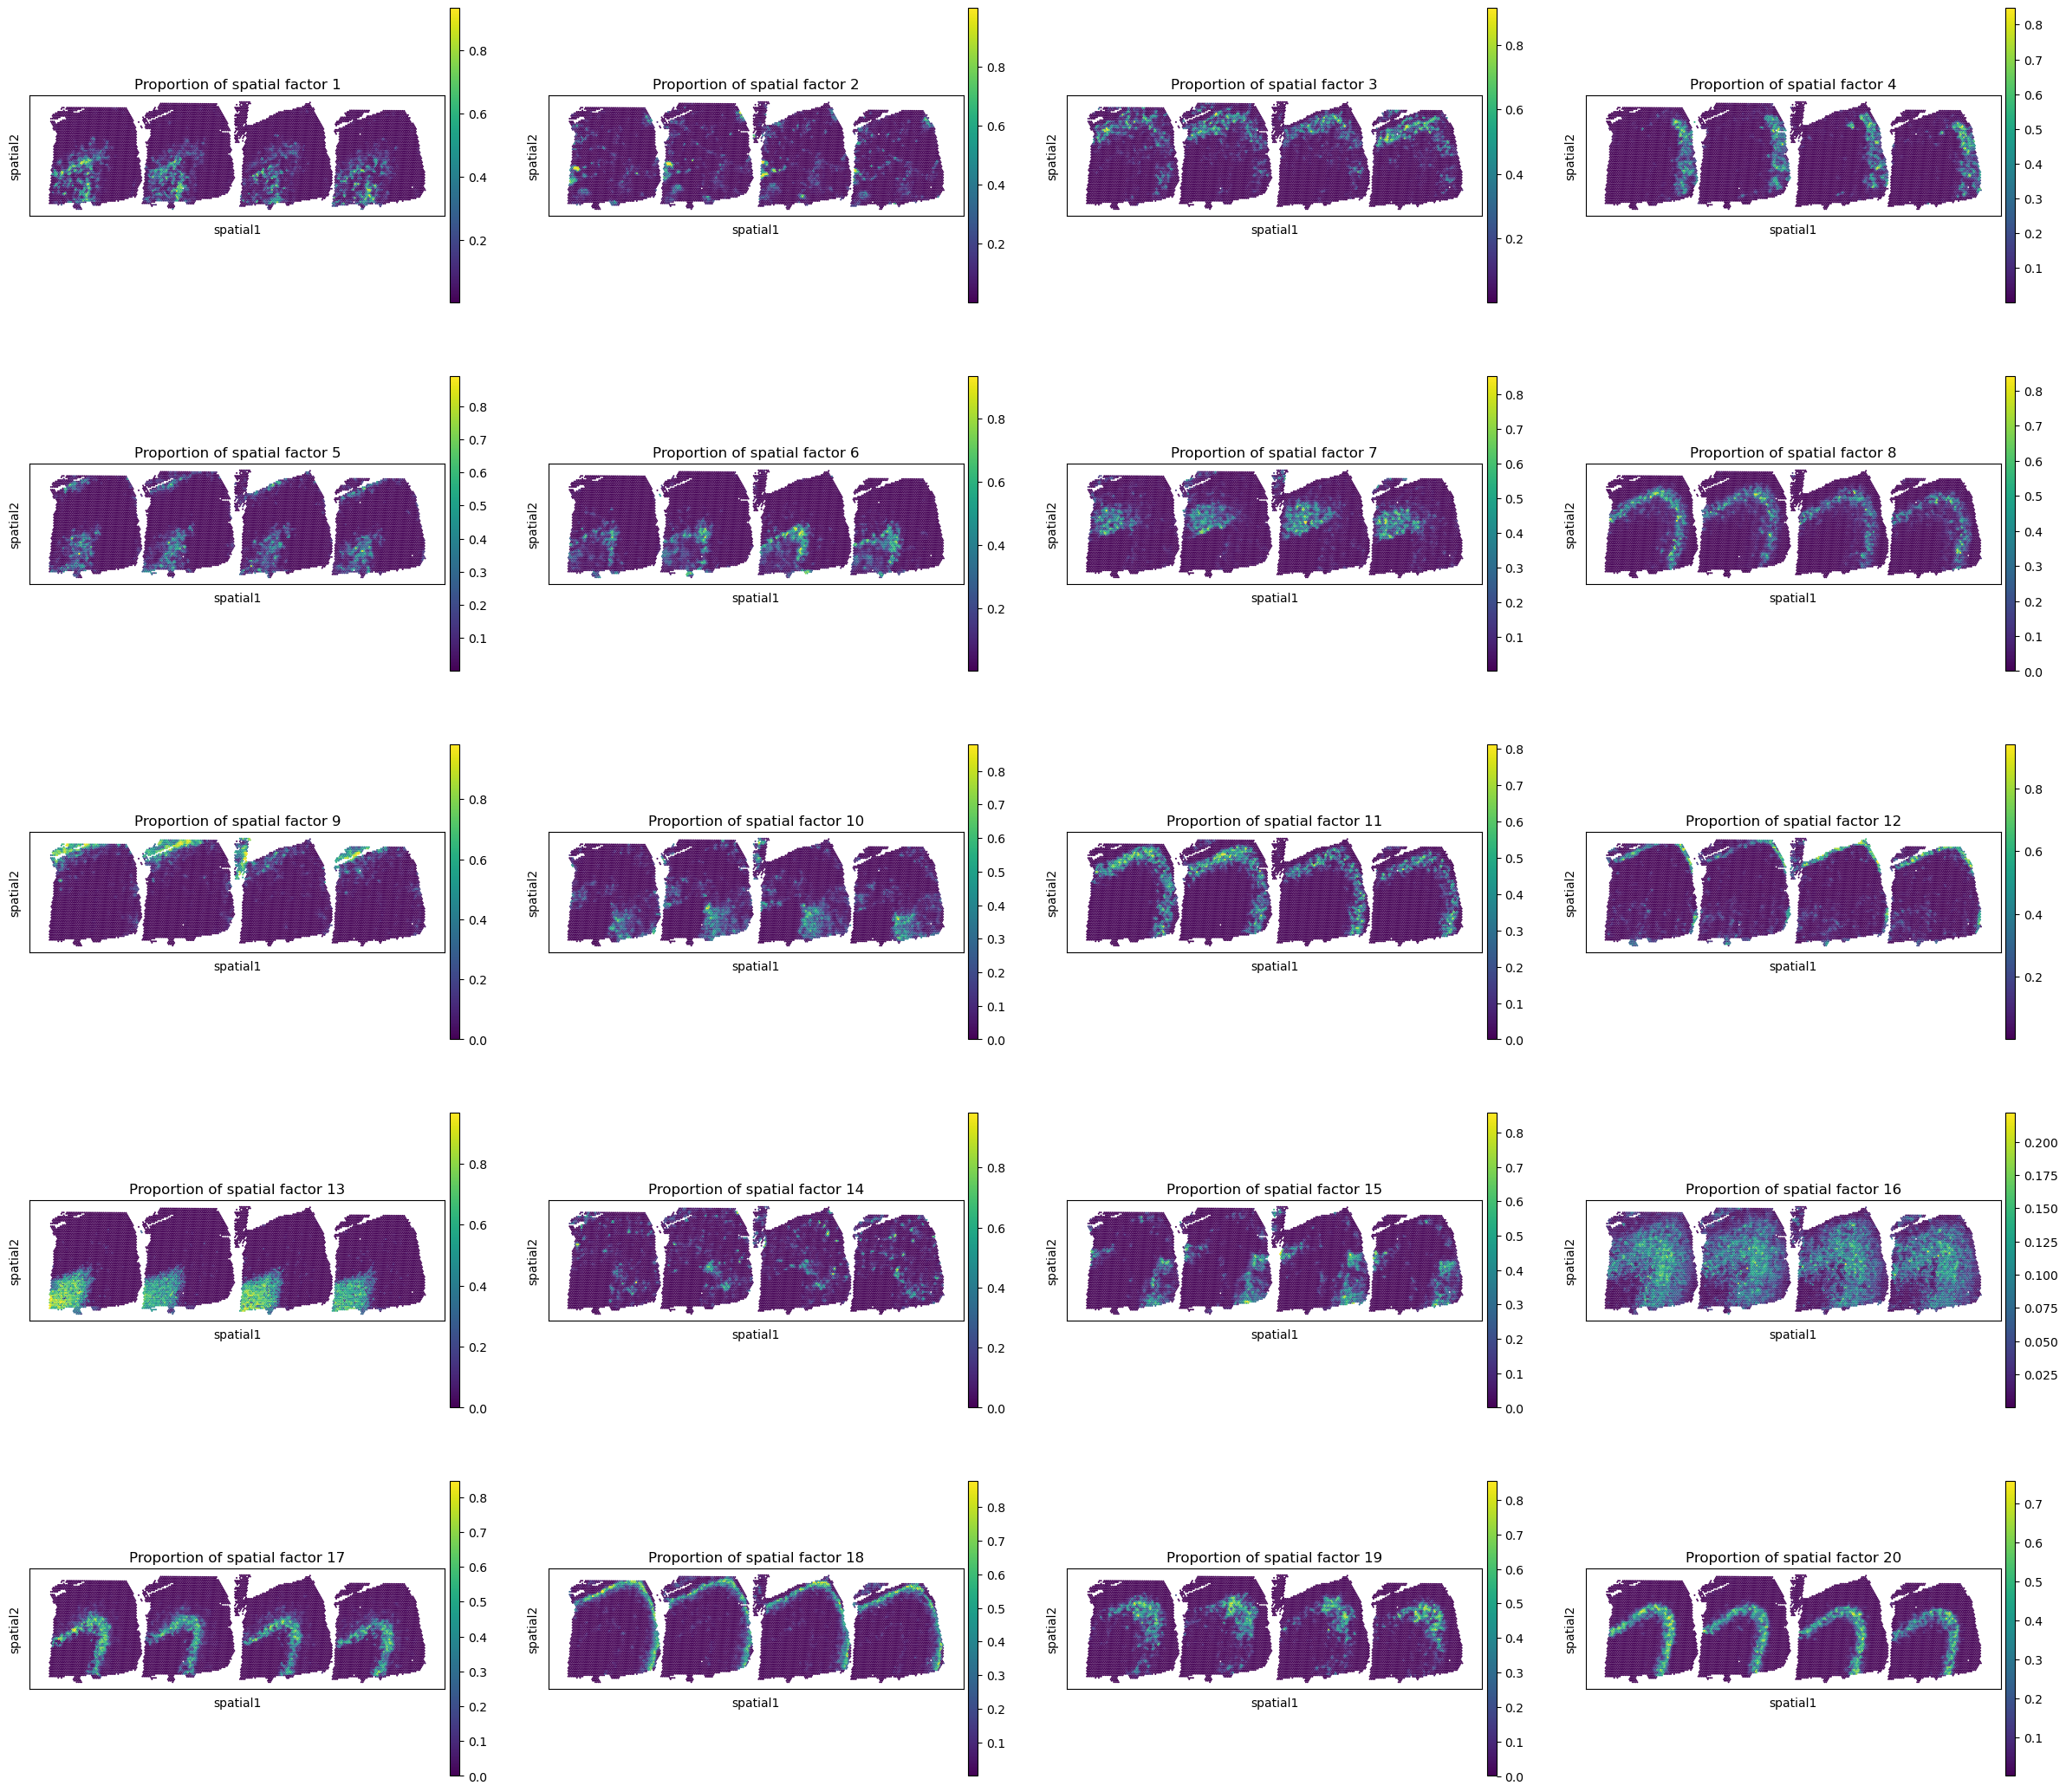

In [8]:
sc.pl.spatial(adata_full, color=["Proportion of spatial factor "+str(i+1) for i in range(20)], spot_size=150.)

### Spot representations and spatial domain identification

In [9]:
# calculate 2D UMAP coordinate of spots based on INSPIRE's learned spot representations.
reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)
embedding = reducer.fit_transform(adata_full.obsm['latent'])
adata_full.obsm["X_umap"] = embedding
adata_full.obs["slice"] = adata_full.obs["slice"].values.astype(str)

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Wed Aug 21 10:53:56 2024 Construct fuzzy simplicial set
Wed Aug 21 10:53:56 2024 Finding Nearest Neighbors
Wed Aug 21 10:53:56 2024 Building RP forest with 11 trees
Wed Aug 21 10:53:59 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	Stopping threshold met -- exiting after 2 iterations
Wed Aug 21 10:54:07 2024 Finished Nearest Neighbor Search
Wed Aug 21 10:54:09 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Aug 21 10:54:22 2024 Finished embedding


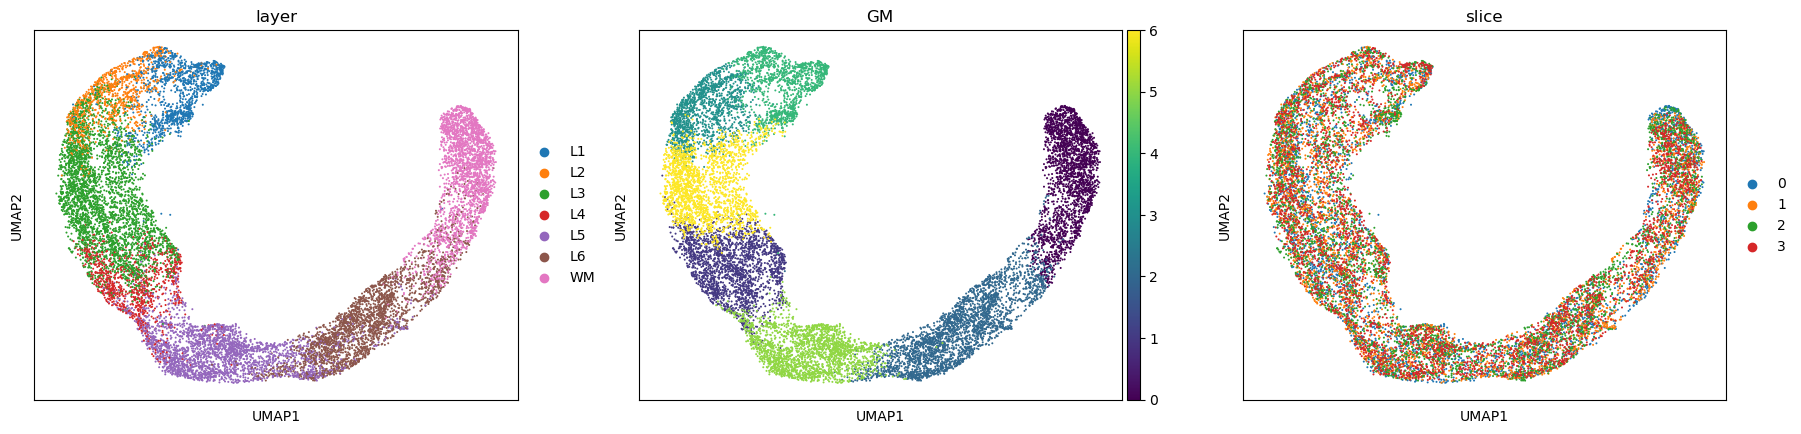

In [10]:
# perform clustering on spot representations (spatial domain identification)
from sklearn.mixture import GaussianMixture
np.random.seed(1234)
gm = GaussianMixture(n_components=7, covariance_type='tied', init_params='kmeans')
y = gm.fit_predict(adata_full.obsm['latent'], y=None)
adata_full.obs["GM"] = y
sc.pl.umap(adata_full, color=["layer", "GM", "slice"])

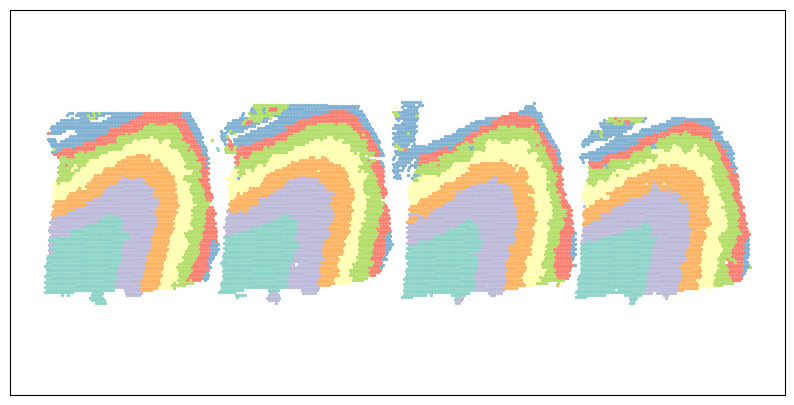

In [11]:
colors = [i for i in get_cmap('Set3').colors]
size = 2.
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
for i in range(len(set(adata_full.obs["GM"]))):
    ax.scatter(adata_full.obsm["spatial"][adata_full.obs["GM"].values.astype(str)==str(i), 0], 
               -adata_full.obsm["spatial"][adata_full.obs["GM"].values.astype(str)==str(i), 1], 
               s=size, color=colors[i], label="cluster "+str(i))
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.show()

In [12]:
### Save results
res_path = "Results/INSPIRE_DLPFC"
adata_full.write(res_path + "/adata_inspire.h5ad")
basis_df.to_csv(res_path + "/basis_df_inspire.csv")